In [1]:
#We now need to clean up our data before we can input into our algorithms
#First we will inport he test data so that we can alter everything at once.

#This is a new notebook so we will import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#import the train and test data

test = pd.read_csv("C:/Users/Max/Documents/Python/Data/titanic test.csv")
train = pd.read_csv("C:/Users/Max/Documents/Python/Data/titanic.csv")

display(test.head())
display(test.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [2]:
#We will create a list of out train_test data, then for all changes run a for loop

train_test_data = [train,test]

for data in train_test_data:
    data["Title"] = data.Name.str.extract(' ([A-Za-z]+)\.')


#Within the Name string we have Mr/Mrs/Miss etc this could be an important feature, so we will extract this

pd.crosstab(train.Title, train.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [3]:
# What is a Jonkheer??? We should replace some of the more uncommen ones with 'Other'

for data in train_test_data:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    
#check the survival rate    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [4]:
#Now we convert to numeric for use as features

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for data in train_test_data:
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'] = data['Title'].fillna(0)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [5]:
#We will now amend the sex feature to numerical

for data in train_test_data:
    data["Sex"] = data["Sex"].map({ 'male':1, 'female': 0 }).astype(int) 

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [6]:
#Age is next, we will need to create bins and then assign them an integer value

#Five is always a good number to use, lets see what max / 5 is
for data in train_test_data:
    print(data.Age.max())
    print(80/5)
    print(data.Age.isnull().sum())
    print(round(data.Age.mean(),2))


80.0
16.0
177
29.7
76.0
16.0
86
30.27


In [7]:
#16 seems like a good fit as out eda showed children were more likely to survive.
#There are a lot of Null values, we will need to replace these. 
#From our EDA we saw that age had maximum correlation with Pclass, so we can use this to fill in the blanks

for data in train_test_data:
    data.loc[data.Age.isnull(), 'Age'] = data.groupby('Pclass').Age.transform('median')
    
for data in train_test_data:
    print(data.Age.max())
    print(80/5)
    print(data.Age.isnull().sum())
    print(round(data.Age.mean(),2))

80.0
16.0
0
29.07
76.0
16.0
0
29.4


In [8]:
#Not much change in the means, so this will be acceptable. We can now create our bands

for data in train_test_data:
    data['AgeBand'] = pd.cut(data['Age'],5)


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


In [10]:
display (train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean())

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [11]:
#We can now change the values to be numerical, we will use 16.

for data in train_test_data:
    data['Age'] = data['Age'].astype(int)
    data.loc[ data['Age'] <= 16, 'Age'] = 0
    data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
    data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
    data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
    data.loc[ data['Age'] > 64, 'Age'] = 4

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]"


In [13]:
display (train[['AgeBand', 'Survived','Age']].groupby(['AgeBand'], as_index=False).mean())

,AgeBand,Survived,Age
0,"(0.34, 16.336]",0.550000,0.000000
1,"(16.336, 32.252]",0.336714,1.000000
2,"(32.252, 48.168]",0.412844,1.990826
3,"(48.168, 64.084]",0.434783,3.000000
4,"(64.084, 80.0]",0.090909,4.000000


In [14]:
#Selecting 16 for our bands had little effect
#Next we look at the features SibSp and Parch, (Siblings and Parents of Children)
#We can create a new feature, family size

for data in train_test_data:
    data['FamSize'] = data['SibSp'] + data['Parch'] + 1
    
train['FamSize'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: FamSize, dtype: float64

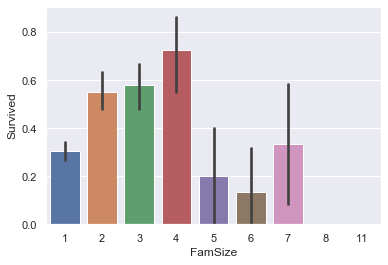

In [15]:
sns.barplot(x="FamSize", y="Survived", data=train)

In [16]:
#So chances of survival increase with family size untill 4, then drops off a cliff.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamSize
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]",2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]",2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1


In [17]:
#Ticket and cabin (It could beargued that the beggining letter would be appropriate to use) are pretty useless as they are pretty much random. We will use Fare and tidy that up
for data in train_test_data:
    display(data['Fare'].isnull().sum())

0

1

In [18]:
#One null value... Lets use the imputation method again  with P class
for data in train_test_data:
    data['Fare'] = train.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [19]:
for data in train_test_data:
    display(data['Fare'].isnull().sum())

0

0

In [20]:
#Let us set up bands for the Fare, we will use four bands this time

for data in train_test_data:
    data['FareBand'] = pd.qcut(data['Fare'], 4)


In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamSize,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,7.2500,NaN,S,1,"(16.336, 32.252]",2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,71.2833,C85,C,3,"(32.252, 48.168]",2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,7.9250,NaN,S,2,"(16.336, 32.252]",1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,53.1000,C123,S,3,"(32.252, 48.168]",2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,8.0500,NaN,S,1,"(32.252, 48.168]",1,"(7.91, 14.454]"


In [22]:
display(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean())

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [23]:
train.FareBand.value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(31.0, 512.329]    222
(14.454, 31.0]     222
Name: FareBand, dtype: int64

In [30]:
for data in train_test_data:
    data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
    data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
    data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
    data.loc[ data['Fare'] > 31, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

In [24]:
#This seems reasonable, now finally we want to change Embarked to numerical values

display(train.Embarked.unique())
display(train.Embarked.value_counts())
display(train.Embarked.isnull().sum())

array(['S', 'C', 'Q', nan], dtype=object)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

2

In [25]:
#We have some Nans so we will fill these with the most popylar embarkation method, S

for data in train_test_data:
    data['Embarked'] = data['Embarked'].fillna('S')
    
display(train.Embarked.isnull().sum())

0

In [26]:
#Now we will map these letters to an integer

for data in train_test_data:
    data['Embarked'] = data['Embarked'].map({ 'S':0 , 'C':1, 'Q':2}).astype(int)

In [27]:
display(train.Embarked.unique())
display(train.Embarked.value_counts())

array([0, 1, 2])

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [31]:
#Fantastic, we should now have all the features ready to train the ml algorithms on

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamSize,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,0,1,"(16.336, 32.252]",2,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,1,3,"(32.252, 48.168]",2,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,0,2,"(16.336, 32.252]",1,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,113803,3,C123,0,3,"(32.252, 48.168]",2,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,373450,1,NaN,0,1,"(32.252, 48.168]",1,"(7.91, 14.454]"


In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,AgeBand,FamSize,FareBand
0,892,3,"Kelly, Mr. James",1,2,0,0,330911,0,NaN,2,1,"(30.502, 45.668]",1,"(-0.001, 7.925]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,363272,3,NaN,0,3,"(45.668, 60.834]",2,"(30.924, 512.329]"
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,240276,1,NaN,2,1,"(60.834, 76.0]",1,"(-0.001, 7.925]"
3,895,3,"Wirz, Mr. Albert",1,1,0,0,315154,3,NaN,0,1,"(15.336, 30.502]",1,"(30.924, 512.329]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,3101298,1,NaN,0,3,"(15.336, 30.502]",3,"(7.925, 14.454]"


In [40]:
#Now we drop the fields that we don't want
drop_features = ['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'AgeBand','FareBand']

train = train.drop(drop_features, axis=1)

In [43]:
train = train.drop('PassengerId', axis = 1)

In [44]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamSize
0,0,3,1,1,0,0,1,2
1,1,1,0,2,3,1,3,2
2,1,3,0,1,1,0,2,1
3,1,1,0,2,3,0,3,2
4,0,3,1,2,1,0,1,1


In [47]:
test = test.drop(drop_features, axis = 1)

In [48]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamSize
0,892,3,1,2,0,2,1,1
1,893,3,0,2,3,0,3,2
2,894,2,1,3,1,2,1,1
3,895,3,1,1,3,0,1,1
4,896,3,0,1,1,0,3,3


In [49]:
#We now need to split up our training set into features and classification

X_train = train.drop("Survived", axis=1)
y_train = train['Survived']

#Also our test set:
X_test = test.drop("PassengerId", axis=1).copy()

X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [50]:
#Let us import all the packages we are going to use:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [51]:
#Logistic Regression first

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)

#Then we test the accuracy
acc_log_reg=round (clf.score(X_train, y_train) * 100, 2)
print(str(acc_log_reg) + '%')

81.59%


In [52]:
#Not bad, let us try Support Vector Machine (SVM)

clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_svc)+'%')

83.39%


In [58]:
#A little better, lets try the linear kernal version:

clf = LinearSVC(C=50)
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_linear_svc)+'%')

76.54%


C:\Users\Max\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [59]:
# hmm not so good and threw an error.
# Let's try a more popular one, the k-Nearest Neighbbr

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_knn)+'%')

86.31%


In [68]:
# That's a little better, let's move onto some of the big hitters
#Decision Tree!! 

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train)*100,2)
print(str(acc_decision_tree)+'%')

88.55%


In [81]:
# Better again, let's try the Random Forest

clf=RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_random_forest)+'%')

88.55%


In [63]:
# The same...interesting
#Lets move on to Gaussian Naive Bayes. 

from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_gnb)+'%')

80.58%


In [64]:
#Not so good, what about perception?

clf = Perceptron()
clf.fit(X_train, y_train)
y_pred_perception = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)
print(str(acc_perceptron)+'%')

80.92%


In [65]:
#looks like we're losing it, last one Stochastic Gradient Descent (SGD)

clf=SGDClassifier(max_iter=5, tol = None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100,2)
print(str(acc_sgd)+'%')

75.98%


In [82]:
#Let's put them all together

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,88.55
5,Random Forest,88.55
3,KNN,86.31
1,Support Vector Machines,83.39
0,Logistic Regression,81.59
7,Perceptron,80.92
6,Naive Bayes,80.58
2,Linear SVC,76.54
8,Stochastic Gradient Decent,75.98


In [76]:
#Decision tree is joint top and this is the one I will submit to Kaggle

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

test['Survived'] = clf.predict(X_test)

In [78]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamSize,Survived
0,892,3,1,2,0,2,1,1,0
1,893,3,0,2,3,0,3,2,0
2,894,2,1,3,1,2,1,1,0
3,895,3,1,1,3,0,1,1,1
4,896,3,0,1,1,0,3,3,0


In [79]:
#Save the CSV
test[['PassengerId', 'Survived']].to_csv('MySubmission1.csv', index = False)

In [83]:
#Only got 67%.. Ill try the random forset

clf=RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)

test['Survived'] = clf.predict(X_test)

test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamSize,Survived
0,892,3,1,2,0,2,1,1,0
1,893,3,0,2,3,0,3,2,0
2,894,2,1,3,1,2,1,1,0
3,895,3,1,1,3,0,1,1,1
4,896,3,0,1,1,0,3,3,0


In [84]:
#Save the CSV
test[['PassengerId', 'Survived']].to_csv('MySubmission2.csv', index = False)